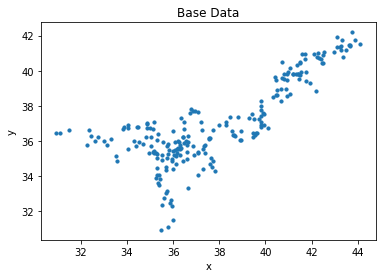

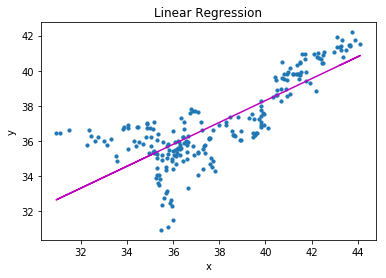

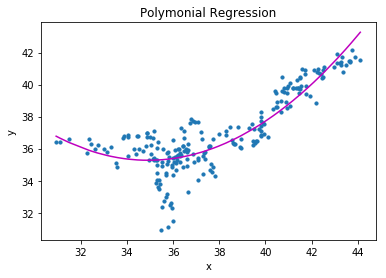

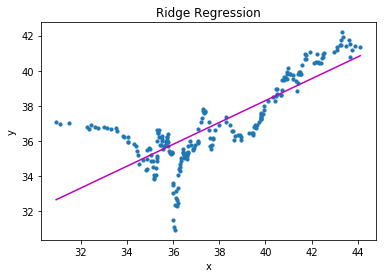

In [154]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import operator

loadfile = 'MAIN.csv'

df = pd.read_csv(loadfile)
df['Date'] = pd.to_datetime(df['Date'])
list = df.columns.values

forecast_out = 30 #'n=30' days
df['Prediction'] = df['Adj Close'].shift(forecast_out)

df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Date', 'Volume'])
df = df[forecast_out:]

X = np.array(df.drop(['Prediction'],1))
y = np.array(df['Prediction'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Base Data')
plt.show()

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X, y)
# Predict
y_predicted = regression_model.predict(X)

# model evaluation
#rmse = mean_squared_error(y, y_predicted)
#r2 = r2_score(y, y_predicted)

# printing values
#print('Slope:' ,regression_model.coef_)
#print('Intercept:', regression_model.intercept_)
##print('Root mean squared error: ', rmse)
#print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
# predicted values
plt.plot(X, y_predicted, color='m')
plt.show()


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
#print(rmse)
#print(r2)

plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.title('Polymonial Regression')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

reg = linear_model.Ridge(alpha=5)
reg.fit(X, y) 
Ridge(alpha=.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
ridge_pred = reg.predict(X)
# data points
plt.scatter(X, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression')
# predicted values
plt.plot(X, ridge_pred, color='m')
plt.show()
